## Basics of quantum mechanics and some testing

In [2]:
import numpy as np
import sympy as sp
import scipy.constants as sc
from sympy.utilities.lambdify import lambdify

from IPython.display import Latex
import matplotlib.pyplot as plt

#Basics
oo = sp.oo
i = sp.I
pi = sp.pi
frac = sp.Rational
Psi, m, h, om = sp.symbols('Psi m hbar omega', real = True, positive = True)
x = sp.Symbol('x', real = True)


#Eigenvalues

#x
x_ = Latex(r'$\int^{\infty}_{-\infty} \Psi^\ast \ x \ \Psi dx$')
#p
p_ = Latex(r'$\int^{\infty}_{-\infty} \Psi^\ast \ \frac{\hbar}{i} \frac{\partial}{\partial x} \ \Psi dx$')
#H
H_ = Latex(r'$\int^{\infty}_{-\infty} \Psi^\ast \ \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \ \Psi dx$')

#Eigenvalue x of given function
def eig_x(Psi_x, a = -oo, b = oo):
    return sp.integrate(sp.conjugate(Psi_x) * x * Psi_x, (x, a, b))
#Eigenvalue p of given function
def eig_p(Psi_x, a = -oo, b = oo):
    return sp.integrate(sp.conjugate(Psi_x) * h/i * sp.diff(Psi_x, x), (x, a, b))
#Eigenvalue H of given function
def eig_H(Psi_x, m, a = -oo, b = oo):
    return sp.integrate(sp.conjugate(Psi_x) * (-h**2/(2 * m)) * sp.diff(Psi_x, x, x), (x, a, b))

#Matrieces (examples)
# M = sp.Matrix([
#     [0, 1, -2],
#     [0, 1, 0],
#     [1, -1, 3]])
#Diagonalization
#if M = PDP^-1, then
#P, D = M.diagonalize()

#Basic operators
def x_hat(Psi_x):
    return Psi * x
def p_hat(Psi_x):
    return h/i * sp.diff(Psi_x, x)


#Ladder operators
def a_p(Psi):
    return 1/sp.sqrt(2 * h * m * om) * (- i * p_hat(Psi) + m * om * x * Psi)
def a_m(Psi):
    return 1/sp.sqrt(2 * h * m * om) * (+ i * p_hat(Psi) + m * om * x * Psi)

#Sympy substitution using scipy constants
def sc_subs(Psi_x):
    return Psi_x.subs([[h, sc.hbar], [pi, sc.pi]])
def full_subs(Psi_x, mass, omega):
    return sc_subs(Psi_x).subs([[m, mass], [om, omega]])

#Plot draw
def quickplot(lam_x):
    x_vals = np.linspace(-1, +1, 100)
    y_vals = lam_x(x_vals)

    plt.plot(x_vals, y_vals)
    plt.ylabel('$\Psi \ (x)$')
    plt.xlabel('x')
    plt.show()

In [3]:
psi_0 = (m * om / (pi * h))**frac(1/4) * sp.exp(-m * om / (2 * h) * x**2)
psi_0

m**(1/4)*omega**(1/4)*exp(-m*omega*x**2/(2*hbar))/(pi**(1/4)*hbar**(1/4))

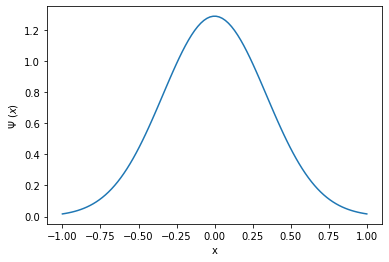

In [4]:
lam_x = lambdify(x, full_subs(psi_0, mass = 9.10938356e-31, omega = 0.001), modules=['numpy'])
quickplot(lam_x)

In [5]:
a_p(psi_0)

sqrt(2)*m**(3/4)*omega**(3/4)*x*exp(-m*omega*x**2/(2*hbar))/(pi**(1/4)*hbar**(3/4))

# 

## Quantum Potential
Quantum oscillator potential: <br>
$V(x) = \frac{1}{2} \cdot m \omega^2  x^2$. <br>
and energy of $E_n$ is given by equation: <br>
$E_n = \hbar \omega (n + \frac{1}{2})$, <br>
where $n = 0,1,2, \ldots$

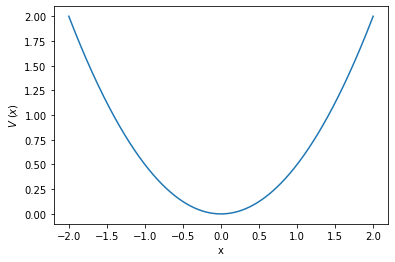

In [6]:
xs = np.linspace(-2, 2, 1000)
def Vpot(x, m, om):
    return 0.5* m * om**2 * x**2
plt.plot(xs, Vpot(xs, m=1, om=1))
plt.ylabel('$V \ (x)$')
plt.xlabel('x')
plt.show()

# Now let's plot $E_n$ on $V(x)$

In [7]:
#Energy of n level
def En(n, om):
    y = 1*om*(n+0.5)
    return  y
En(1, 1)


1.5

In [10]:
# To plot first i En we will use
def plotEn(N, om):
    #mass
    m = 1
    
    xs = np.linspace(-10, 10, 1000)
    plt.ylim(0, En(N, om) + En(0, om))
    plt.xlim(-5, 5)
    plt.plot(xs, Vpot(xs, m = m, om = om))
    for i in range(N):
        x_extreme = np.sqrt(2 * En(i, om) / (m * om**2))
        plt.hlines(y = En(i, om), xmin = -x_extreme, xmax = x_extreme, color = 'r', linestyle = '-')
    plt.ylabel('$E(x)$')
    plt.xlabel('$x$')
    return plt.show() 

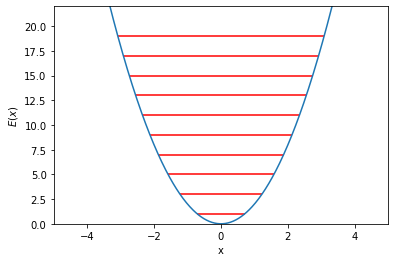

In [9]:
plotEn(N=10,om=2)